In [1]:
!python test_evomain.py 100 10

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import subprocess

def graph_evo_out(fname):
    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # Make a list of columns
    command = "head -n 1 " + fname + " | cut -d ',' -f 2,3,4,5"
    all_col = subprocess.check_output(command, shell=True).rstrip()
    all_col = all_col.decode("utf-8")
    columns = all_col.split(',')

    # Read a CSV file
    df = pd.read_csv(fname, usecols=columns)

    # Plot the lines
    df.plot()
    plt.show()
    
def graph_plots(fname1, fname2):
    graph_evo_out(fname1)
    graph_evo_out(fname2)

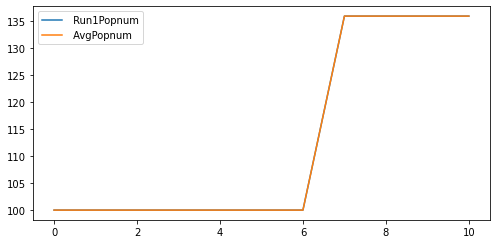

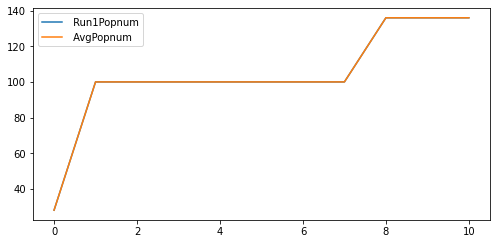

In [3]:
fname1 = "sim_output/ind_population_data.csv"
fname2 = "sim_output/fsource_population_data.csv"

graph_plots(fname1, fname2)